STUDENTS MENTAL HEALTH ANALYSIS

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
students=pd.read_csv("Student Mental health.csv")

In [5]:
students.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Remove cols

In [6]:
students.drop('Timestamp',axis=1,inplace=True)

In [7]:
students.head(3)

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


removing null and duplicates

In [8]:
students.isna().sum()

Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [14]:
students.dropna(inplace=True)

In [15]:
students.isna().sum()

Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [18]:
students.drop_duplicates(inplace=True)

renamin cols


In [20]:
students.columns = [
    'gender',
    'age',
    'course',
    'study_year',
    'cgpa_range',
    'marital_status',
    'depression',
    'anxiety',
    'panic_attack',
    'sought_treatment'
]

In [22]:
students.columns

Index(['gender', 'age', 'course', 'study_year', 'cgpa_range', 'marital_status',
       'depression', 'anxiety', 'panic_attack', 'sought_treatment'],
      dtype='object')

dataset ready for the analysis

In [23]:
students.head()

,gender,age,course,study_year,cgpa_range,marital_status,depression,anxiety,panic_attack,sought_treatment
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


Gender Distribution

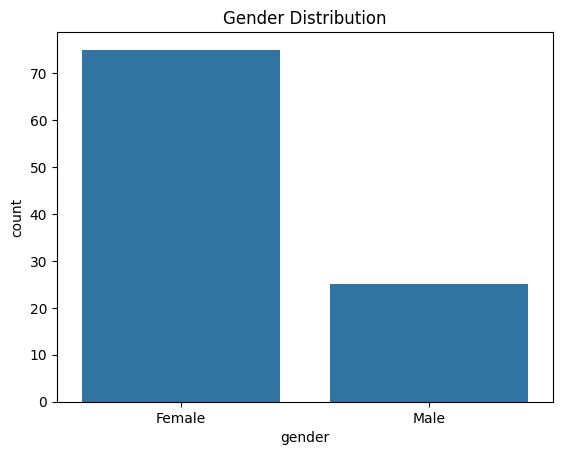

In [27]:
ax = sns.countplot(data=students, x="gender")
plt.title("Gender Distribution")
plt.show()

 CGPA Distribution

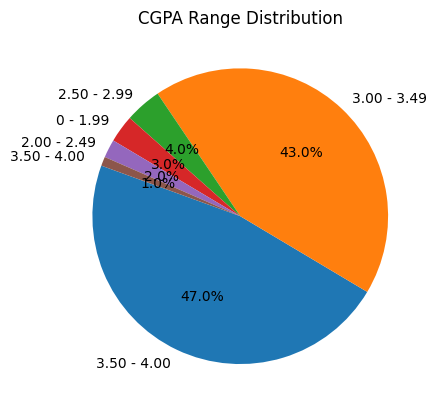

In [44]:
cgpa_counts = students['cgpa_range'].value_counts()
plt.pie(cgpa_counts, labels=cgpa_counts.index, autopct='%1.1f%%', startangle=160)
plt.title("CGPA Range Distribution")
plt.show()


 Depression vs Anxiety vs Panic Attack Prevalence

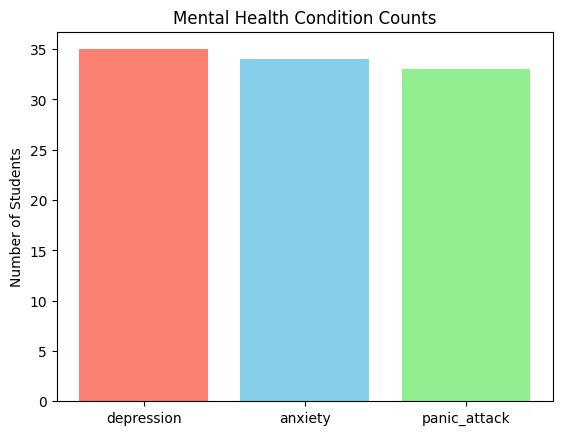

In [52]:
conditions = ['depression', 'anxiety', 'panic_attack']
counts = [students[c].value_counts().get('Yes', 0) for c in conditions]

plt.bar(conditions, counts, color=['salmon', 'skyblue', 'lightgreen'])
plt.title("Mental Health Condition Counts")
plt.ylabel("Number of Students")
plt.show()


CGPA Range by Gender

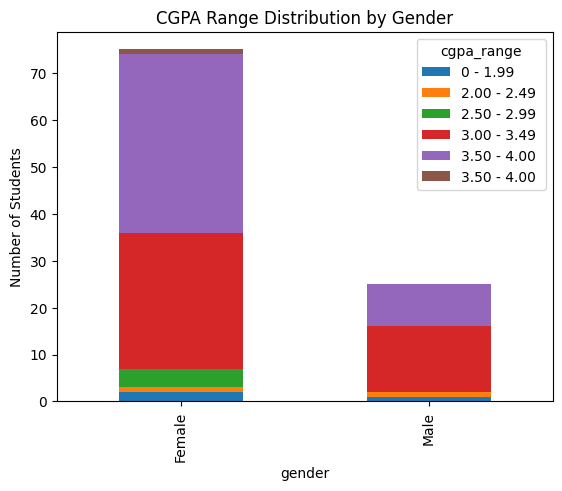

In [54]:
cgpa_gender = students.groupby(['gender', 'cgpa_range']).size().unstack()
cgpa_gender.plot(kind='bar', stacked=True)
plt.title("CGPA Range Distribution by Gender")
plt.ylabel("Number of Students")
plt.show()


Mental Health Conditions Correlation

C:\Users\hasan\AppData\Local\Temp\ipykernel_73072\824025483.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  binary_df = students[['depression', 'anxiety', 'panic_attack']].replace({'Yes': 1, 'No': 0})


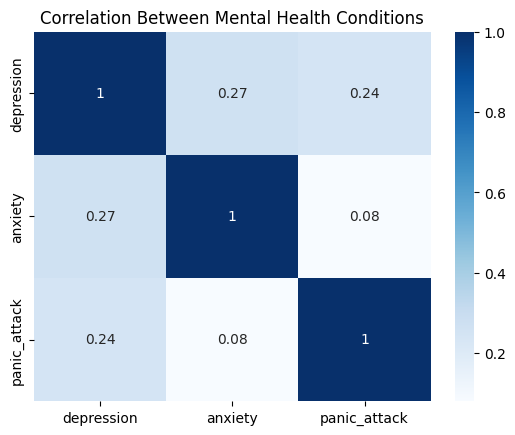

In [56]:
binary_df = students[['depression', 'anxiety', 'panic_attack']].replace({'Yes': 1, 'No': 0})
sns.heatmap(binary_df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Mental Health Conditions")
plt.show()

Age Distribution

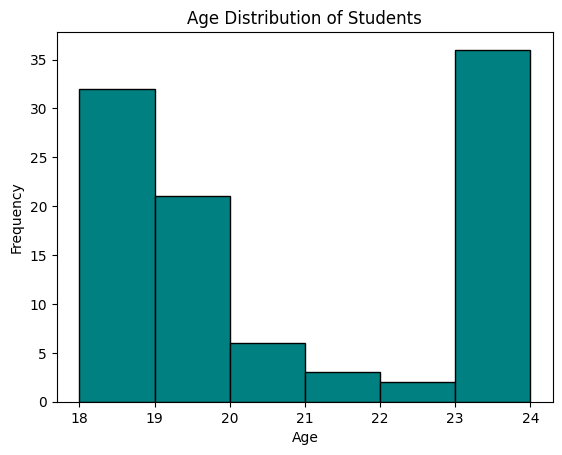

In [57]:
students['age'].plot(kind='hist', bins=6, color='teal', edgecolor='black')
plt.title("Age Distribution of Students")
plt.xlabel("Age")
plt.show()


 Treatment-Seeking Behavior by Gender

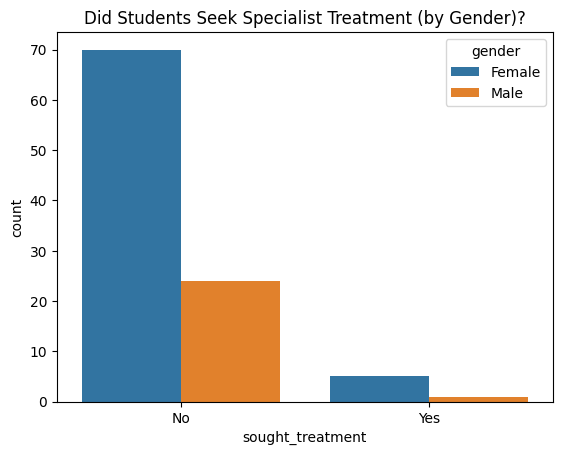

In [58]:
sns.countplot(data=students, x='sought_treatment', hue='gender')
plt.title("Did Students Seek Specialist Treatment (by Gender)?")
plt.show()


Panic Attack Cases by Study Year

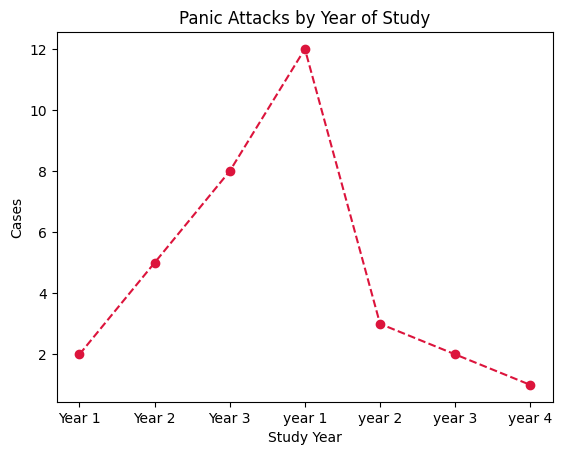

In [63]:
panic_by_year = students[students['panic_attack'] == 'Yes']['study_year'].value_counts().sort_index()
panic_by_year.plot(marker='o', linestyle='--', color='crimson')
plt.title("Panic Attacks by Year of Study")
plt.xlabel("Study Year")
plt.ylabel("Cases")
plt.show()


Marital Status vs Mental Health Conditions

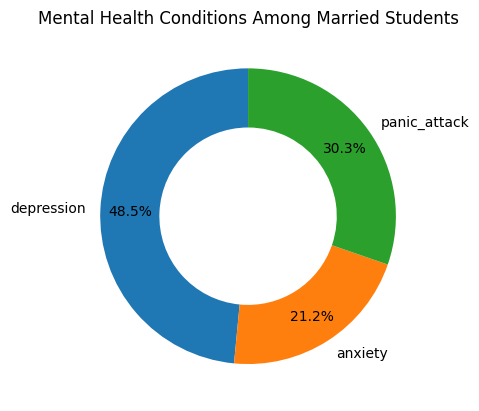

In [69]:
married= students[students['marital_status'] == 'Yes']
count =married[['depression', 'anxiety', 'panic_attack']].apply(lambda x: x.eq('Yes').sum())

plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4},pctdistance=0.8)
plt.title("Mental Health Conditions Among Married Students")
plt.show()
